In [1]:
%matplotlib notebook
from pylab import *
from ipywidgets import *
from numpy import *

<IPython.core.display.Javascript object>


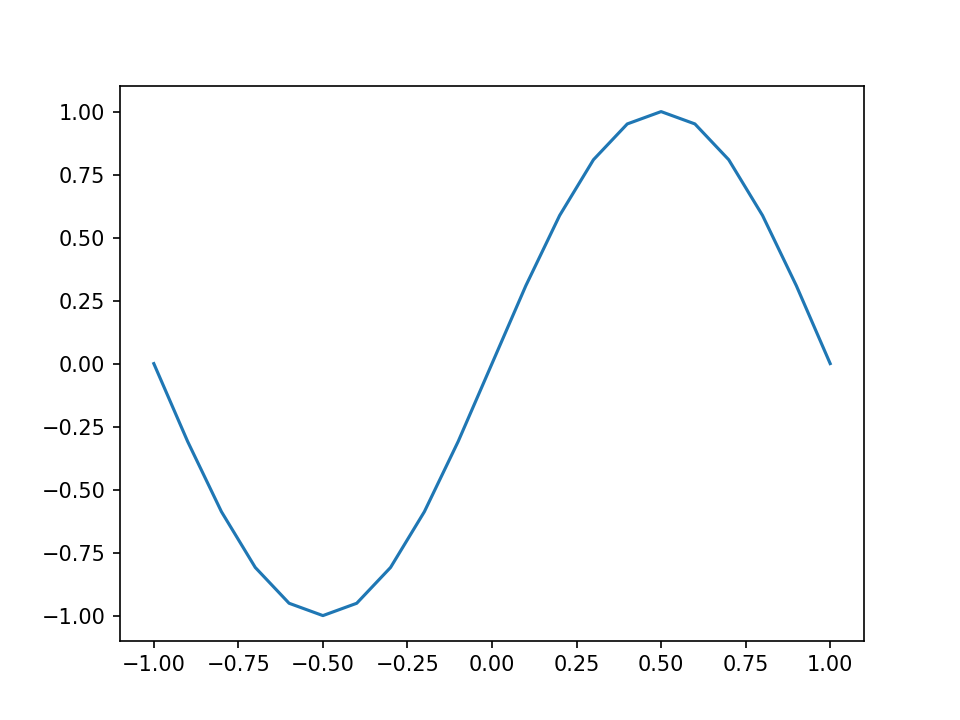

In [7]:
# nodes
N=20
Nx=arange(-1,1.01,2./N)
# velocity distribution
vn=ones(N+1,float64)
vn=sin(Nx*pi)
#vn=cos(3*Nx*pi/2)
# frequency and wave number
k=1000*2*pi/343.
figure(1)
plot(Nx,vn)

In [8]:
# 2-point Gauss integration weight
x_i=sqrt(1/3)

# BE and form functions
class BemEl:

    def __init__(self,n1,n2):
        self.x1=Nx[n1]
        self.x2=Nx[n2]
        self.v1=vn[n1]
        self.v2=vn[n2]
        self.l=abs(self.x1-self.x2)
        
    def v(self,r):
        return self.v1*0.5*(1-r)+self.v2*0.5*(1+r)
        
    def R(self,r,x,y):
        x0=0.5*((self.x2-self.x1)*r + self.x2 + self.x1)
        return sqrt((x0-x)**2+y**2)
        
    def G(self,r,x,y):
        R=self.R(r,x,y)
        return exp(-1j*k*R)/(2*pi*R)
        
    def integrate(self,x,y):
        integral=self.l/2*(self.G(-x_i,x,y)*self.v(-x_i)+self.G(x_i,x,y)*self.v(x_i))
        return integral
    
    def plot(self):
        plot((self.x1,self.x2),(0,0),'-')

<IPython.core.display.Javascript object>


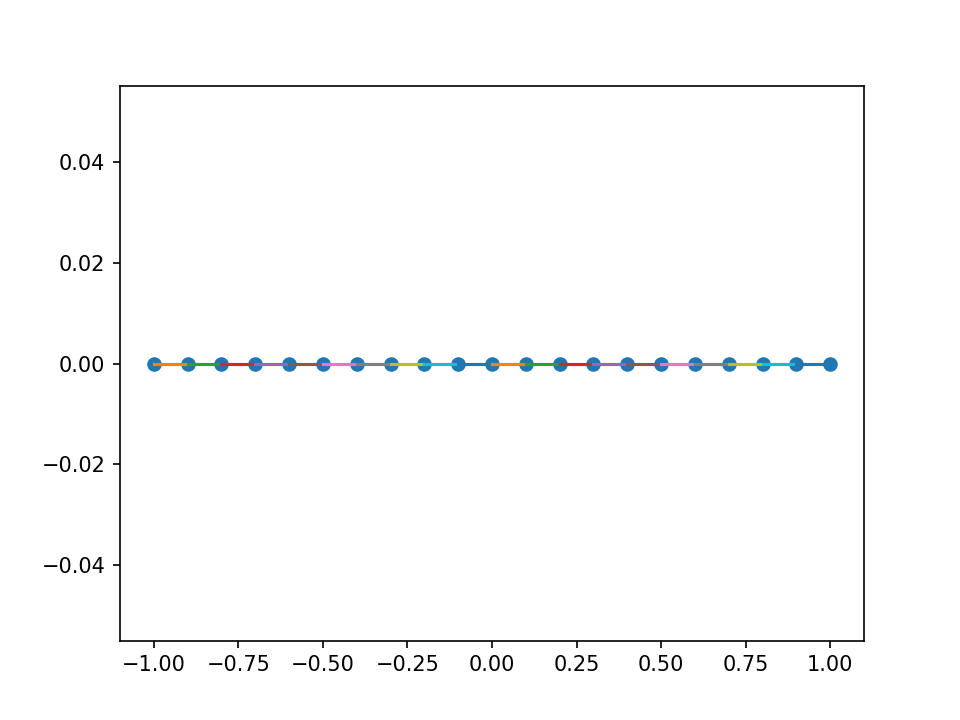

In [9]:
# assembling elements
el=[]    
for i in range(N):
    el.append(BemEl(i,i+1))
figure(2)
plot(Nx,zeros_like(Nx),'o')
for e in el:
    e.plot()

In [10]:
# field points
[X,Y]=meshgrid(arange(-4,4.01,0.1),arange(0.2,8.01,0.1))
p=0j*X
# results computation
for i in range(N):
    p+=el[i].integrate(X,Y)   

<IPython.core.display.Javascript object>


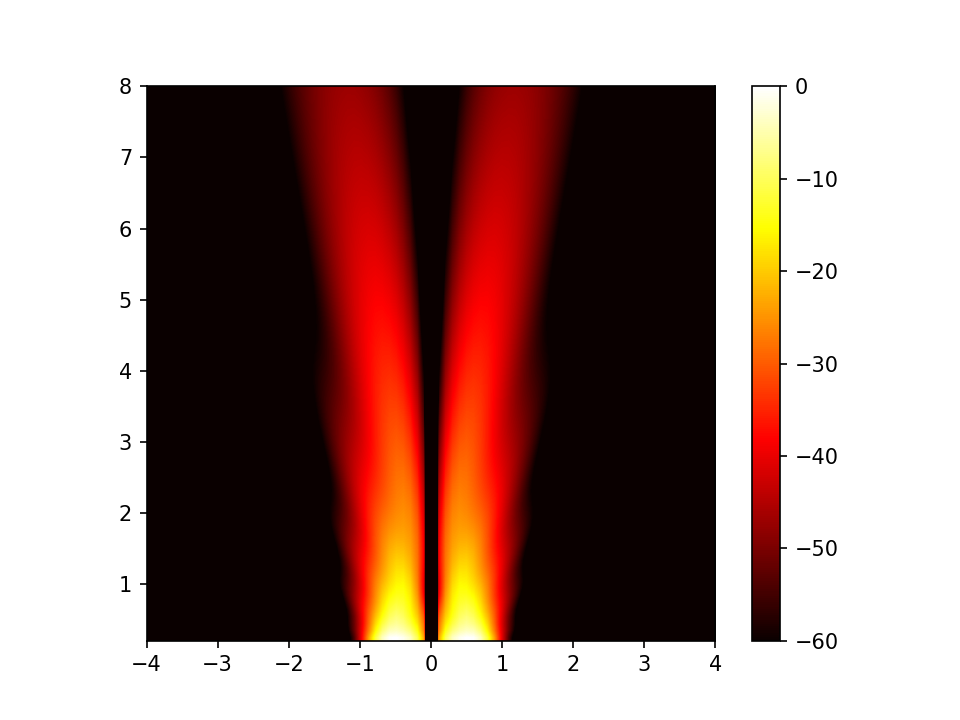

In [11]:
figure(3)
# plot scaled Lp
Lp=20*log(abs(p))
Lp=Lp-Lp.max()
imshow(Lp, interpolation='bilinear', origin='lower', extent=(-4,4,0.2,8),vmin=-60)
colorbar()
hot()